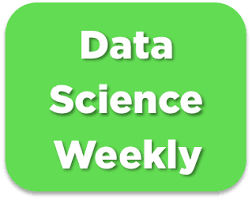

# Challenge : predict conversions 🏆🏆

This is the template that shows the different steps of the challenge. In this notebook, all the training/predictions steps are implemented for a very basic model (logistic regression with only one variable). Please use this template and feel free to change the preprocessing/training steps to get the model with the best f1-score ! May the force be with you 🧨🧨  

**For a detailed description of this project, please refer to *02-Conversion_rate_challenge.ipynb*.**

# Import libraries

In [242]:
import pandas as pd
import numpy as np

from sklearn.ensemble import (RandomForestClassifier, AdaBoostClassifier, 
                              GradientBoostingClassifier, ExtraTreesClassifier)
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import StackingClassifier
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix, roc_curve, ConfusionMatrixDisplay, RocCurveDisplay, classification_report
from xgboost import XGBClassifier

import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
import plotly.io as pio
pio.templates.default = "plotly_dark"
from IPython.display import display

import warnings
warnings.filterwarnings("ignore")

# Read file with labels

In [243]:
data = pd.read_csv('conversion_data_train.csv')
print('Set with labels (our train+test) :', data.shape)

Set with labels (our train+test) : (284580, 6)


In [244]:
data.head()

,country,age,new_user,source,total_pages_visited,converted
0,China,22,1,Direct,2,0
1,UK,21,1,Ads,3,0
2,Germany,20,0,Seo,14,1
3,US,23,1,Seo,3,0
4,US,28,1,Direct,3,0


# Explore dataset

In [245]:
# The dataset is quite big : you must create a sample of the dataset before making any visualizations !
data_sample = data.sample(10000)

In [246]:
corr = data_sample.corr()

fig = go.Figure()

fig.add_trace(go.Heatmap(
    z = corr,
    x = corr.columns.values,
    y = corr.columns.values,
    colorscale=px.colors.diverging.RdBu,
    zmid=0
))

fig.update_layout(width=1200, height=900, title='Correlation Heatmap')
fig.show()

In [247]:
data['converted'].value_counts(normalize=True)

0    0.967742
1    0.032258
Name: converted, dtype: float64

In [248]:
data_sample.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10000 entries, 22807 to 40375
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   country              10000 non-null  object
 1   age                  10000 non-null  int64 
 2   new_user             10000 non-null  int64 
 3   source               10000 non-null  object
 4   total_pages_visited  10000 non-null  int64 
 5   converted            10000 non-null  int64 
dtypes: int64(4), object(2)
memory usage: 546.9+ KB


The only strongly correlated feature with `converted` is `total_pages_visited`.

# Make your model

## Choose variables to use in the model, and create train and test sets
**From the EDA, we know that the most useful feature is total_pages_visited. Let's create a baseline model by using at first only this feature : in the next cells, we'll make preprocessings and train a simple (univariate) logistic regression.**

In [249]:
features_list = ['total_pages_visited']
numeric_indices = [0]
categorical_indices = []
target_variable = 'converted'

In [250]:
X = data.loc[:, features_list]
Y = data.loc[:, target_variable]

print('Explanatory variables : ', X.columns)
print()

Explanatory variables :  Index(['total_pages_visited'], dtype='object')



In [251]:
# Divide dataset Train set & Test set 
print("Dividing into train and test sets...")
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.1, random_state=0)
print("...Done.")
print()

Dividing into train and test sets...
...Done.



In [252]:
# Convert pandas DataFrames to numpy arrays before using scikit-learn
print("Convert pandas DataFrames to numpy arrays...")
X_train = X_train.values
X_test = X_test.values
Y_train = Y_train.values
Y_test = Y_test.values
print("...Done")

print(X_train[0:5,:])
print(X_test[0:2,:])
print()
print(Y_train[0:5])
print(Y_test[0:2])

Convert pandas DataFrames to numpy arrays...
...Done
[[4]
 [8]
 [2]
 [3]
 [4]]
[[7]
 [5]]

[0 0 0 0 0]
[0 0]


## Training pipeline

In [253]:
# Put here all the preprocessings
print("Encoding categorical features and standardizing numerical features...")

featureencoder = StandardScaler()
X_train = featureencoder.fit_transform(X_train)
print("...Done")
print(X_train[0:5,:])

Encoding categorical features and standardizing numerical features...
...Done
[[-0.26070136]
 [ 0.93728655]
 [-0.85969532]
 [-0.56019834]
 [-0.26070136]]


In [254]:
# Train model
print("Train model...")
classifier = LogisticRegression() # 
classifier.fit(X_train, Y_train)
print("...Done.")

Train model...
...Done.


In [255]:
# Predictions on training set
print("Predictions on training set...")
Y_train_pred = classifier.predict(X_train)
print("...Done.")
print(Y_train_pred)
print()

Predictions on training set...
...Done.
[0 0 0 ... 0 0 0]



## Test pipeline

In [256]:
# Use X_test, and the same preprocessings as in training pipeline, 
# but call "transform()" instead of "fit_transform" methods (see example below)

print("Encoding categorical features and standardizing numerical features...")

X_test = featureencoder.transform(X_test)
print("...Done")
print(X_test[0:5,:])

Encoding categorical features and standardizing numerical features...
...Done
[[ 0.63778957]
 [ 0.03879562]
 [-0.26070136]
 [-0.26070136]
 [ 0.63778957]]


In [257]:
# Predictions on test set
print("Predictions on test set...")
Y_test_pred = classifier.predict(X_test)
print("...Done.")
print(Y_test_pred)
print()

Predictions on test set...
...Done.
[0 0 0 ... 0 0 0]



## Performance assessment

In [258]:
# WARNING : Use the same score as the one that will be used by Kaggle !
# Here, the f1-score will be used to assess the performances on the leaderboard
print("f1-score on train set : ", f1_score(Y_train, Y_train_pred))
print("f1-score on test set : ", f1_score(Y_test, Y_test_pred))

f1-score on train set :  0.6938517686692869
f1-score on test set :  0.7060240963855423


In [259]:
# You can also check more performance metrics to better understand what your model is doing
print("Confusion matrix on train set : ")
print(confusion_matrix(Y_train, Y_train_pred))
print()
print("Confusion matrix on test set : ")
print(confusion_matrix(Y_test, Y_test_pred))
print()

Confusion matrix on train set : 
[[246817   1082]
 [  3280   4943]]

Confusion matrix on test set : 
[[27384   117]
 [  371   586]]



**Our baseline model reaches a f1-score of almost 70%. Now, feel free to refine your model and try to beat this score ! 🚀🚀**

## Model selection and hyperparameter tuning

In [260]:
data_sample.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10000 entries, 22807 to 40375
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   country              10000 non-null  object
 1   age                  10000 non-null  int64 
 2   new_user             10000 non-null  int64 
 3   source               10000 non-null  object
 4   total_pages_visited  10000 non-null  int64 
 5   converted            10000 non-null  int64 
dtypes: int64(4), object(2)
memory usage: 546.9+ KB


In [261]:
# Split the dataset into train and test sets
cols = ['country', 'age', 'new_user', 'source', 'total_pages_visited']
X = data[cols]
y = data['converted']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42, stratify=y)

In [262]:
# Convert pandas DataFrames to numpy arrays before using scikit-learn
print("Convert pandas DataFrames to numpy arrays...")
X_train = X_train.values
X_test = X_test.values
y_train = y_train.values
y_test = y_test.values
print("...Done")

print(X_train[0:5,:])
print(X_test[0:2,:])
print()
print(y_train[0:5])
print(y_test[0:2])

Convert pandas DataFrames to numpy arrays...
...Done
[['China' 23 1 'Seo' 4]
 ['US' 17 1 'Ads' 4]
 ['US' 23 1 'Ads' 4]
 ['US' 25 0 'Seo' 8]
 ['US' 31 1 'Seo' 5]]
[['US' 24 1 'Seo' 6]
 ['US' 26 1 'Seo' 7]]

[0 0 0 0 0]
[0 0]


In [263]:
# Preprocessing
numeric_features = [1, 2, 4]
numeric_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())
])

categorical_features = [0, 3]
categorical_transformer = Pipeline(
    steps=[
    ('encoder', OneHotEncoder(drop="first"))
    ])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ])

X_train = preprocessor.fit_transform(X_train)
X_test = preprocessor.transform(X_test)

In [264]:
X_train.shape

(213435, 8)

In [115]:
# Instantiate classifiers
tree = DecisionTreeClassifier(max_depth=5)
knn = KNeighborsClassifier()
nb = GaussianNB()
logreg = LogisticRegression()
rfc = RandomForestClassifier()


In [32]:
# Quick model review
knn.fit(X_train, y_train)
y_train_knn = knn.predict(X_train)
y_test_knn = knn.predict(X_test)

print(f"F1 Score for the KNN model on train set: {f1_score(y_train, y_train_knn)}")
print(f"F1 Score for the KNN model on test set: {f1_score(y_test, y_test_knn)}\n")

tree.fit(X_train, y_train)
y_train_tree = tree.predict(X_train)
y_test_tree = tree.predict(X_test)

print(f"F1 Score for the Decision Tree model on train set: {f1_score(y_train, y_train_tree)}")
print(f"F1 Score for the Decision Tree model on test set: {f1_score(y_test, y_test_tree)}\n")

nb.fit(X_train, y_train)
y_train_nb = nb.predict(X_train)
y_test_nb = nb.predict(X_test)

print(f"F1 Score for the Naive Bayes model on train set: {f1_score(y_train, y_train_nb)}")
print(f"F1 Score for the Naive Bayes model on test set: {f1_score(y_test, y_test_nb)}\n")

logreg.fit(X_train, y_train)
y_train_logreg = logreg.predict(X_train)
y_test_logreg = logreg.predict(X_test)

print(f"F1 Score for the Logistic Regression model on train set: {f1_score(y_train, y_train_logreg)}")
print(f"F1 Score for the Logistic Regression model on test set: {f1_score(y_test, y_test_logreg)}\n")

rfc.fit(X_train, y_train)
y_train_rfc = rfc.predict(X_train)
y_test_rfc = rfc.predict(X_test)

print(f"F1 Score for the Random Forest model on train set: {f1_score(y_train, y_train_rfc)}")
print(f"F1 Score for the Random Forest model on test set: {f1_score(y_test, y_test_rfc)}")


F1 Score for the KNN model on train set: 0.7798613299716356
F1 Score for the KNN model on test set: 0.7364414843006661

F1 Score for the Decision Tree model on train set: 0.742246335735687
F1 Score for the Decision Tree model on test set: 0.7466601894583434

F1 Score for the Naive Bayes model on train set: 0.6891154225583689
F1 Score for the Naive Bayes model on test set: 0.6933386677335468

F1 Score for the Logistic Regression model on train set: 0.763873250764034
F1 Score for the Logistic Regression model on test set: 0.7619970916141542

F1 Score for the Random Forest model on train set: 0.8082991479962133
F1 Score for the Random Forest model on test set: 0.7328605200945627


Logistic Regression and Random Forest seem to be the most promising so we'll stick to them from now on.

In [39]:
# Random Forest Grid Search
classifier = RandomForestClassifier()
params = {"n_estimators": [10, 25, 50, 100], 'max_depth': range(2, 11, 2), 'min_samples_split': [2, 5, 10]}

gridsearch = GridSearchCV(classifier, param_grid = params, cv = 5, scoring='f1_micro', verbose=2)
gridsearch.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'max_depth': range(2, 11, 2),
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [10, 25, 50, 100]},
             scoring='f1_micro')

In [40]:
print("Best hyperparameters : ", gridsearch.best_params_)

Best hyperparameters :  {'max_depth': 8, 'min_samples_split': 10, 'n_estimators': 100}


In [41]:
rfc = RandomForestClassifier(max_depth= 8, min_samples_split= 10, n_estimators= 100)
rfc.fit(X_train, y_train)
y_train_rfc = rfc.predict(X_train)
y_test_rfc = rfc.predict(X_test)

print(f"F1 Score for the Random Forest model on train set: {f1_score(y_train, y_train_rfc)}")
print(f"F1 Score for the Random Forest model on test set: {f1_score(y_test, y_test_rfc)}")

F1 Score for the Random Forest model on train set: 0.7643114164213282
F1 Score for the Random Forest model on test set: 0.751913107874599


Score is OK and there is no overfitting, let's try Logistic Regression with a grid search.

In [46]:
# Logistic Regression Grid Search
classifier = LogisticRegression()
params = {'penalty': ['l1', 'l2', 'elasticnet', 'none'], 'solver': ['lbfgs','newton-cg','liblinear','sag','saga'], 'C': np.linspace(0.01, 5, 10), 'max_iter': [100, 250, 500, 1000]}

gridsearch = GridSearchCV(classifier, param_grid = params, cv = 5, scoring='f1_micro', verbose=2)
gridsearch.fit(X_train, y_train)

/Users/guillaumearp/miniforge3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1483: UserWarning:

Setting penalty='none' will ignore the C and l1_ratio parameters

/Users/guillaumearp/miniforge3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1483: UserWarning:

Setting penalty='none' will ignore the C and l1_ratio parameters

/Users/guillaumearp/miniforge3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1483: UserWarning:

Setting penalty='none' will ignore the C and l1_ratio parameters

/Users/guillaumearp/miniforge3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1483: UserWarning:

Setting penalty='none' will ignore the C and l1_ratio parameters

/Users/guillaumearp/miniforge3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1483: UserWarning:

Setting penalty='none' will ignore the C and l1_ratio parameters

/Users/guillaumearp/miniforge3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1483: UserWa

GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': array([0.01      , 0.56444444, 1.11888889, 1.67333333, 2.22777778,
       2.78222222, 3.33666667, 3.89111111, 4.44555556, 5.        ]),
                         'max_iter': [100, 250, 500, 1000],
                         'penalty': ['l1', 'l2', 'elasticnet', 'none'],
                         'solver': ['lbfgs', 'newton-cg', 'liblinear', 'sag',
                                    'saga']},
             scoring='f1_micro')

In [48]:
print("Best hyperparameters : ", gridsearch.best_params_)

Best hyperparameters :  {'C': 1.118888888888889, 'max_iter': 100, 'penalty': 'l2', 'solver': 'lbfgs'}


In [265]:
logreg = LogisticRegression(penalty='l2', solver='lbfgs', C=1.12, max_iter=100)
logreg.fit(X_train, y_train)
y_train_logreg = logreg.predict(X_train)
y_test_logreg = logreg.predict(X_test)

print(f"F1 Score for the Logistic Regression model on train set: {f1_score(y_train, y_train_logreg)}")
print(f"F1 Score for the Logistic Regression model on test set: {f1_score(y_test, y_test_logreg)}\n")

F1 Score for the Logistic Regression model on train set: 0.7640395275970113
F1 Score for the Logistic Regression model on test set: 0.7619970916141542



In [266]:
pd.Series(y_test_logreg).value_counts(normalize=True)

0    0.974264
1    0.025736
dtype: float64

In [138]:
df = pd.read_csv('conversion_data_train.csv')
df['converted'].value_counts(normalize=True)

0    0.967742
1    0.032258
Name: converted, dtype: float64

In [178]:
xgb = XGBClassifier(max_depth=8, min_child_weight=10, n_estimators=100)
xgb.fit(X_train, y_train)
y_train_xgb = xgb.predict(X_train)
y_test_xgb = xgb.predict(X_test)

print(f"F1 Score for the XGBoost Classifier model on train set: {f1_score(y_train, y_train_xgb)}")
print(f"F1 Score for the XGBoost Classifier model on test set: {f1_score(y_test, y_test_xgb)}\n")

F1 Score for the XGBoost Classifier model on train set: 0.7768092762894843
F1 Score for the XGBoost Classifier model on test set: 0.7603941360249941



In [176]:
classifier = XGBClassifier()
params = {"n_estimators": [50, 100, 200], 'max_depth': range(2, 9, 2), 'learning_rate': [0.01, 0.05, 0.1, 0.2, 0.3, 0.4, 0.5], 'colsample_bytree': [0.5, 0.75, 1.0]}

gridsearch = GridSearchCV(classifier, param_grid = params, cv = 5, scoring='f1_micro', verbose=2)
gridsearch.fit(X_train, y_train)

Fitting 5 folds for each of 252 candidates, totalling 1260 fits
[CV] END colsample_bytree=0.5, learning_rate=0.01, max_depth=2, n_estimators=50; total time=   0.5s
[CV] END colsample_bytree=0.5, learning_rate=0.01, max_depth=2, n_estimators=50; total time=   0.5s
[CV] END colsample_bytree=0.5, learning_rate=0.01, max_depth=2, n_estimators=50; total time=   0.5s
[CV] END colsample_bytree=0.5, learning_rate=0.01, max_depth=2, n_estimators=50; total time=   0.7s
[CV] END colsample_bytree=0.5, learning_rate=0.01, max_depth=2, n_estimators=50; total time=   0.5s
[CV] END colsample_bytree=0.5, learning_rate=0.01, max_depth=2, n_estimators=100; total time=   0.9s
[CV] END colsample_bytree=0.5, learning_rate=0.01, max_depth=2, n_estimators=100; total time=   1.0s
[CV] END colsample_bytree=0.5, learning_rate=0.01, max_depth=2, n_estimators=100; total time=   1.0s
[CV] END colsample_bytree=0.5, learning_rate=0.01, max_depth=2, n_estimators=100; total time=   1.1s
[CV] END colsample_bytree=0.5, l

GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     gamma=None, gpu_id=None, grow_policy=None,
                                     importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None, max_bin=None,
                                     max_ca...
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     n_estimators=100, n_jobs=None,
                        

In [177]:
print("Best hyperparameters : ", gridsearch.best_params_)

Best hyperparameters :  {'colsample_bytree': 0.5, 'learning_rate': 0.4, 'max_depth': 2, 'n_estimators': 100}


In [267]:
xgb = XGBClassifier(n_estimators=100, colsample_bytree=0.5, max_depth=2, learning_rate=0.4)
xgb.fit(X_train, y_train)
y_train_xgb = xgb.predict(X_train)
y_test_xgb = xgb.predict(X_test)

print(f"F1 Score for the XGBoost Classifier model on train set: {f1_score(y_train, y_train_xgb)}")
print(f"F1 Score for the XGBoost Classifier model on test set: {f1_score(y_test, y_test_xgb)}\n")

F1 Score for the XGBoost Classifier model on train set: 0.7642524490123657
F1 Score for the XGBoost Classifier model on test set: 0.7606382978723404



# Train best classifier on all data and use it to make predictions on X_without_labels
**Before making predictions on the file conversion_data_test.csv, let's train our model on ALL the data that was in conversion_data_train.csv. Sometimes, this allows to make tiny improvements in the score because we're using more examples to train the model.**

In [275]:
# Concatenate our train and test set to train your best classifier on all data with labels
X_full = np.append(X_train,X_test,axis=0)
y_full = np.append(y_train,y_test)

logreg = LogisticRegression(penalty='l2', solver='lbfgs', C=1.12, max_iter=100)
logreg.fit(X_full,y_full)

xgb = XGBClassifier(n_estimators=100, colsample_bytree=0.5, max_depth=2, learning_rate=0.4)
xgb.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=0.5,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.4, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=2, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, ...)

In [269]:
X_full.shape

(284580, 8)

In [270]:
# Read data without labels
data_without_labels = pd.read_csv('conversion_data_test.csv')
print('Prediction set (without labels) :', data_without_labels.shape)

# Warning : check consistency of features_list (must be the same than the features 
# used by your best classifier)

data_without_labels = data_without_labels.loc[:, cols]
data_without_labels = data_without_labels.values
X_without_labels = preprocessor.transform(data_without_labels)

# Convert pandas DataFrames to numpy arrays before using scikit-learn


print(X_without_labels[0:5,:])

Prediction set (without labels) : (31620, 5)
[[-0.30935647 -1.47847297  3.3266299   0.          1.          0.
   0.          1.        ]
 [-1.03417936  0.67637354  0.03732609  0.          1.          0.
   1.          0.        ]
 [ 0.17385878  0.67637354 -1.15878439  0.          0.          0.
   0.          1.        ]
 [ 0.17385878  0.67637354  0.33635371  0.          0.          1.
   0.          0.        ]
 [-0.67176792 -1.47847297 -0.56072915  0.          0.          0.
   0.          1.        ]]


In [129]:
# # WARNING : PUT HERE THE SAME PREPROCESSING AS FOR YOUR TEST SET
# # CHECK YOU ARE USING X_without_labels
# print("Encoding categorical features and standardizing numerical features...")

# X_without_labels = preprocessor.transform(X_without_labels)
# print("...Done")
# print(X_without_labels[0:5,:])

In [273]:
# Make predictions and dump to file
# WARNING : MAKE SURE THE FILE IS A CSV WITH ONE COLUMN NAMED 'converted' AND NO INDEX !
# WARNING : FILE NAME MUST HAVE FORMAT 'conversion_data_test_predictions_[name].csv'
# where [name] is the name of your team/model separated by a '-'
# For example : [name] = AURELIE-model1


results = {
    'converted': logreg.predict(X_without_labels)
}

Y_predictions = pd.DataFrame(columns=['converted'],data=results)
Y_predictions.to_csv('conversion_data_test_predictions_Guillaume-LR.csv', index=False)


In [276]:
y_test_full_lr = logreg.predict(X_without_labels)
pd.Series(y_test_full_lr).value_counts(normalize=True)

0    0.974004
1    0.025996
dtype: float64

In [277]:
y_test_full_xgb = xgb.predict(X_without_labels)
print(pd.Series(y_test_full_xgb).value_counts(normalize=True))

results = {
    'converted': xgb.predict(X_without_labels)
}

Y_predictions = pd.DataFrame(columns=['converted'],data=results)
Y_predictions.to_csv('conversion_data_test_predictions_Guillaume-XGB.csv', index=False)

0    0.973972
1    0.026028
dtype: float64


## Analyzing the coefficients and interpreting the result
**In this template, we just trained a model with only one feature (total_pages_visited), so there's no analysis to be done about the feature importance 🤔**

**Once you've included more features in your model, please take some time to analyze the model's parameters and try to find some lever for action to improve the newsletter's conversion rate 😎😎**

In [220]:
features_encoded = preprocessor.transformers_[1][1].named_steps['encoder'].get_feature_names_out().tolist()

In [222]:
df = pd.read_csv('conversion_data_train.csv')
columns = df.columns.tolist()
columns.pop(0)
columns.pop(2)
columns = columns[:-1]
columns += features_encoded
columns

['age',
 'new_user',
 'total_pages_visited',
 'x0_Germany',
 'x0_UK',
 'x0_US',
 'x1_Direct',
 'x1_Seo']

In [233]:
importance_logreg = logreg.coef_[0]
coef_logreg = pd.DataFrame([np.exp(x)/(1 + np.exp(x)) for x in logreg.coef_[0]], columns, columns=['coef']).sort_values(by='coef', ascending=False)
coef_logreg

,coef
x0_Germany,0.975096
x0_UK,0.970426
x0_US,0.957487
total_pages_visited,0.926931
x1_Seo,0.496350
x1_Direct,0.450101
age,0.354667
new_user,0.312322


`country` and `total_pages_visited` seem to be the most important features, followed by `source` with half the coefficient, and finally `age` and `new_user`.